In [1]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import gamma
from data_generate import popn1_simple_morgan,popn2_simple_data_morgan

In [7]:
all_data = pd.DataFrame({'y':[],'u':[],'v':[],'group':[],'N':[],'T':[]})
L = [0.5,10000]
N = [2000,3000,4000,5000,6000,7000,8000,9000,10000,15000,20000,25000,30000]
T = [50,100,150,200,300]
for i in range(10):
    for k in range(len(N)):
        for t in T:
            data = popn2_simple_data_morgan([N[k]]*3,t,L,2,1e6,5)
            data['N'] = [N[k]]*len(data['y'])
            data['T'] = [t]*len(data['y'])
            all_data = pd.concat([all_data,pd.DataFrame(data)],ignore_index=True)
        

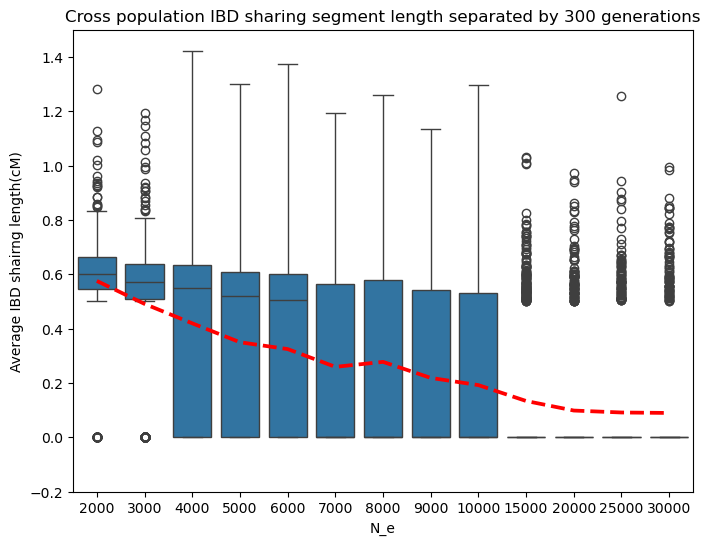

In [51]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='N', y='y', data=all_data[(all_data['T']==300)&(all_data['group']==2)])
mean_values = all_data[(all_data['T']==300)&(all_data['group']==2)].groupby('N')['y'].mean().reset_index()
sns.pointplot(x='N', y='y', data=mean_values, color='red', markers='', linestyles='--')
unique_n_values = sorted(all_data[(all_data['T']==300)&(all_data['group']==2)]['N'].unique())
plt.xticks(ticks=range(len(unique_n_values)), labels=[str(int(n)) for n in unique_n_values])


plt.ylim([-0.2, 1.5])
plt.title('Cross population IBD sharing segment length separated by 300 generations')
plt.xlabel('N_e')
plt.ylabel('Average IBD shairng length(cM)')
plt.show()


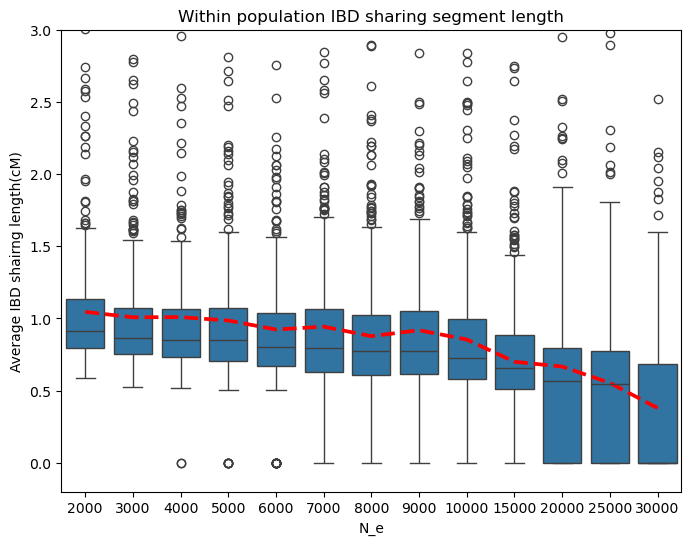

In [52]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='N', y='y', data=all_data[(all_data['T']==300)&(all_data['group']==1)])
mean_values = all_data[(all_data['T']==300)&(all_data['group']==1)].groupby('N')['y'].mean().reset_index()
sns.pointplot(x='N', y='y', data=mean_values, color='red', markers='', linestyles='--')
unique_n_values = sorted(all_data[(all_data['T']==300)&(all_data['group']==1)]['N'].unique())
plt.xticks(ticks=range(len(unique_n_values)), labels=[str(int(n)) for n in unique_n_values])


plt.ylim([-0.2, 3])
plt.title('Within population IBD sharing segment length')
plt.xlabel('N_e')
plt.ylabel('Average IBD shairng length(cM)')
plt.show()